In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('customer_tier_classification.csv')
data.head()

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze


In [3]:
len(data)

1218

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1218 non-null   int64  
 1   age             1218 non-null   int64  
 2   income_k        1128 non-null   float64
 3   credit_score    1144 non-null   float64
 4   clicks_7d       1218 non-null   int64  
 5   is_premium      1218 non-null   bool   
 6   email_verified  1211 non-null   object 
 7   city            1170 non-null   object 
 8   segment         1193 non-null   object 
 9   tenure_bucket   1187 non-null   object 
 10  device          1218 non-null   object 
 11  tier            1218 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 106.0+ KB


In [5]:
data.describe()

,id,age,income_k,credit_score,clicks_7d
count,1218.000000,1218.000000,1128.000000,1144.000000,1218.000000
mean,601.366174,32.059934,47.100319,65.889073,3.956486
std,346.482696,8.400837,52.372401,14.742599,2.794332
min,1.000000,18.000000,6.730000,22.100000,0.000000
25%,301.250000,26.000000,24.790000,55.575000,2.000000
50%,602.500000,32.000000,36.585000,65.700000,3.000000
75%,900.750000,38.000000,52.360000,76.300000,6.000000
max,1200.000000,61.000000,939.310000,100.000000,14.000000


In [6]:
data.isnull().sum()

id                 0
age                0
income_k          90
credit_score      74
clicks_7d          0
is_premium         0
email_verified     7
city              48
segment           25
tenure_bucket     31
device             0
tier               0
dtype: int64

In [7]:
# Find duplicate rows
data.duplicated().sum()

np.int64(18)

In [8]:
# Find columns with duplicate values
for col in data.columns:
    duplicates = data[col].duplicated().sum()
    unique_count = data[col].nunique()
    if duplicates > 0:
        print(f"{col}: {duplicates} duplicates ({unique_count} unique values out of {len(data)} rows)")

id: 18 duplicates (1200 unique values out of 1218 rows)
age: 1177 duplicates (41 unique values out of 1218 rows)
income_k: 192 duplicates (1025 unique values out of 1218 rows)
credit_score: 719 duplicates (498 unique values out of 1218 rows)
clicks_7d: 1203 duplicates (15 unique values out of 1218 rows)
is_premium: 1216 duplicates (2 unique values out of 1218 rows)
email_verified: 1215 duplicates (2 unique values out of 1218 rows)
city: 1191 duplicates (26 unique values out of 1218 rows)
segment: 1207 duplicates (10 unique values out of 1218 rows)
tenure_bucket: 1213 duplicates (4 unique values out of 1218 rows)
device: 1215 duplicates (3 unique values out of 1218 rows)
tier: 1215 duplicates (3 unique values out of 1218 rows)


In [9]:
data.drop_duplicates() 

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,920,18,55.54,57.5,4,True,False,Kochi,C,5+y,Android,Gold
1214,212,20,123.79,71.8,4,False,True,Bhopal,D,New,Android,Gold
1215,503,26,39.25,80.4,0,False,True,Vizag,D,1-3y,Android,Gold
1216,538,42,32.72,58.1,3,False,True,Madurai,B,1-3y,iOS,Silver


In [10]:
data['tier'].value_counts()

tier
Gold      415
Bronze    402
Silver    401
Name: count, dtype: int64

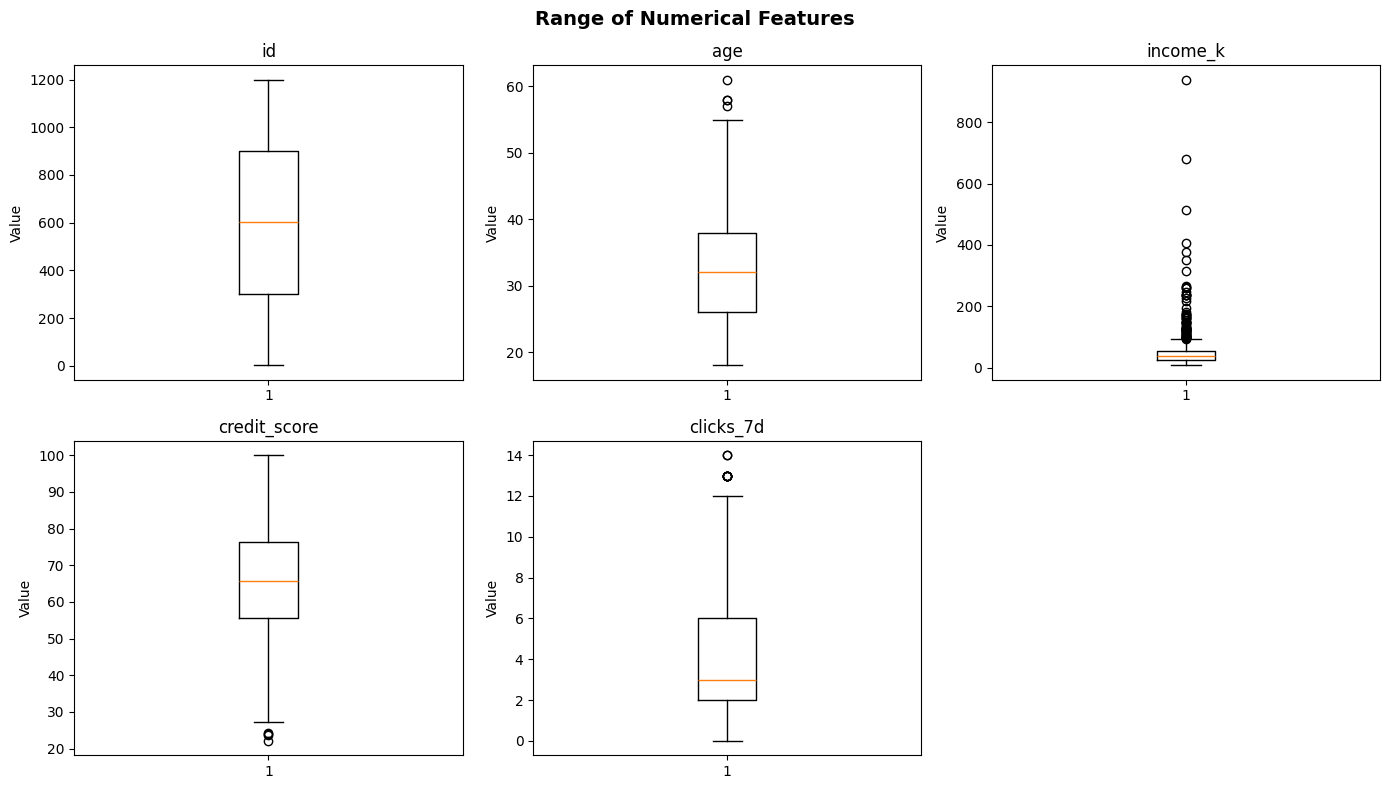

In [11]:
import matplotlib.pyplot as plt

# Get numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create box plots to show range of numerical features
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Hide the last empty subplot if odd number of columns
if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

plt.suptitle('Range of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


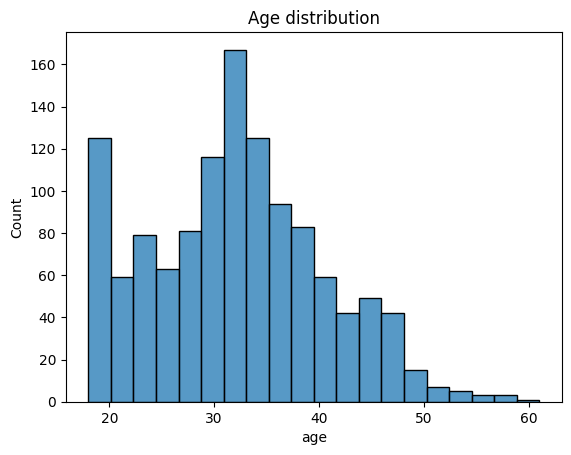

In [14]:
import seaborn as sns
sns.histplot(data['age'])
plt.title('Age distribution')
plt.show()

In [15]:
data['age'].value_counts()

age
18    82
35    63
36    63
29    62
34    62
31    60
30    54
32    54
33    53
38    47
28    46
24    41
23    38
39    36
40    36
27    35
22    35
26    34
37    31
25    29
42    25
45    25
44    24
21    24
41    23
20    22
19    21
43    17
48    16
46    15
47    11
49     8
50     7
51     6
54     3
55     3
53     2
58     2
52     1
57     1
61     1
Name: count, dtype: int64

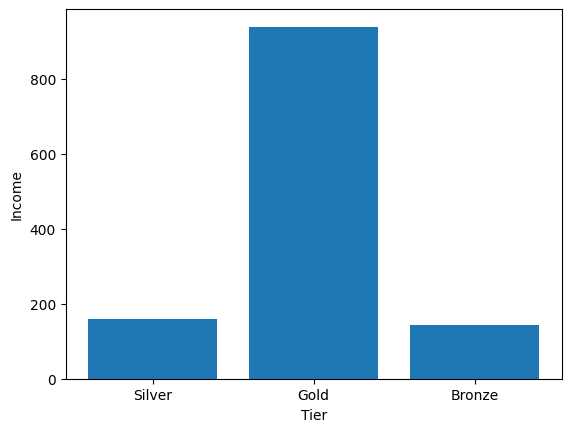

In [16]:
plt.bar(data['tier'],data['income_k'])
plt.xlabel('Tier')
plt.ylabel('Income')
plt.show()



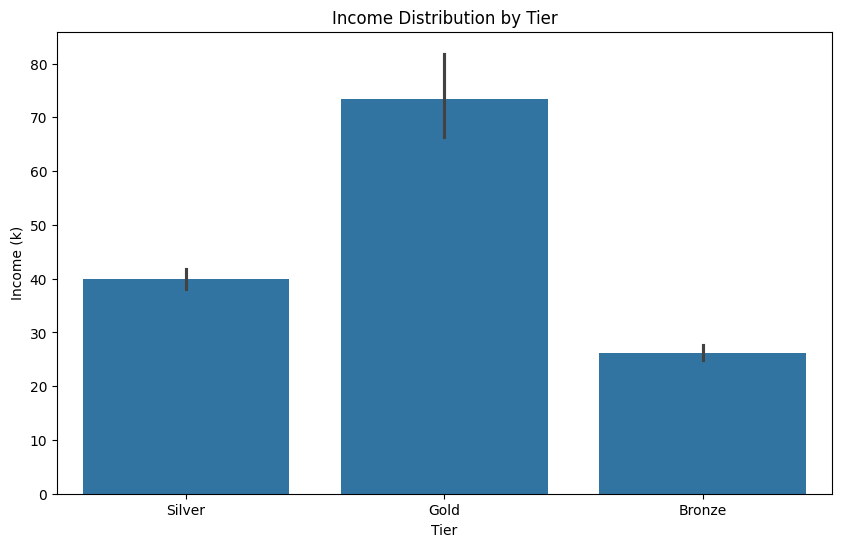

        count       mean        std    min     25%    50%      75%     max
tier                                                                      
Bronze  362.0  26.218398  14.124215   6.73  16.720  23.45  31.8875  142.53
Gold    391.0  73.383964  79.006764  13.15  38.395  54.33  74.6750  939.31
Silver  375.0  39.853253  19.148130  11.40  26.850  36.85  47.5850  160.68


In [17]:
import matplotlib.pyplot as plt

# 1. Box plot showing income_k distribution per tier
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='tier', y='income_k')
plt.title('Income Distribution by Tier')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Tier')
plt.ylabel('Income (k)')
plt.show()

# 2. Summary statistics of income_k by tier
print(data.groupby('tier')['income_k'].describe())

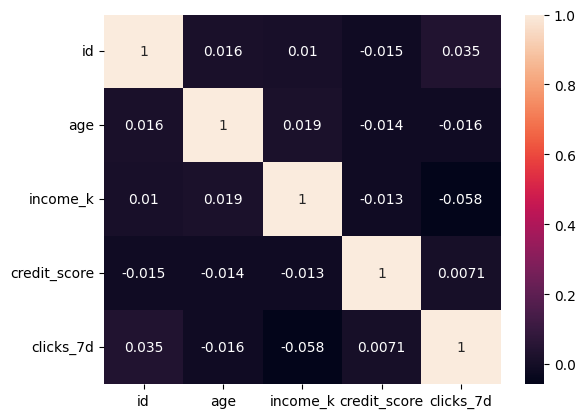

In [18]:
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True )
plt.show()


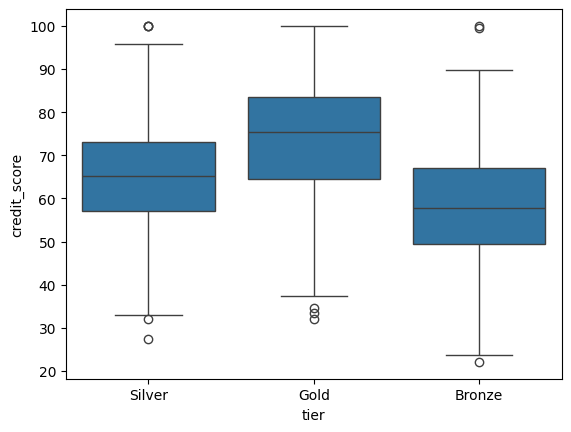

In [19]:
sns.boxplot(x='tier', y='credit_score', data=data)
plt.show()

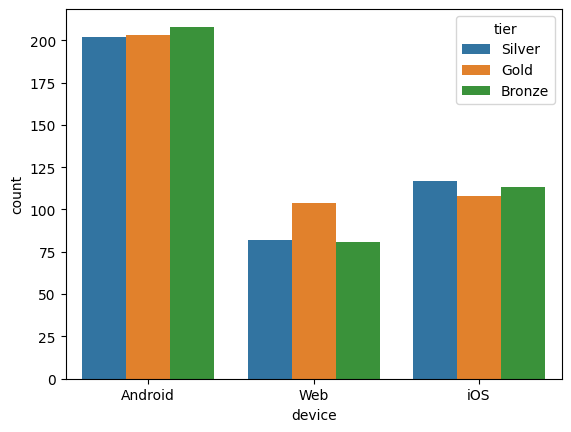

In [20]:
sns.countplot(hue='tier', x='device', data=data)
plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1218 non-null   int64  
 1   age             1218 non-null   int64  
 2   income_k        1128 non-null   float64
 3   credit_score    1144 non-null   float64
 4   clicks_7d       1218 non-null   int64  
 5   is_premium      1218 non-null   bool   
 6   email_verified  1211 non-null   object 
 7   city            1170 non-null   object 
 8   segment         1193 non-null   object 
 9   tenure_bucket   1187 non-null   object 
 10  device          1218 non-null   object 
 11  tier            1218 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 106.0+ KB


In [22]:
cat_colums=data.select_dtypes(include=['object','bool']).columns   

cat_colums

Index(['is_premium', 'email_verified', 'city', 'segment', 'tenure_bucket',
       'device', 'tier'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data.columns:
    if i in cat_colums:
        data[i]= label_encoder.fit_transform(data[i])
    

In [24]:
data[cat_colums].head()

,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,0,1,26,1,4,0,2
1,1,1,11,0,4,1,1
2,0,1,1,0,1,0,1
3,0,1,5,3,0,0,0
4,0,1,26,0,2,2,0


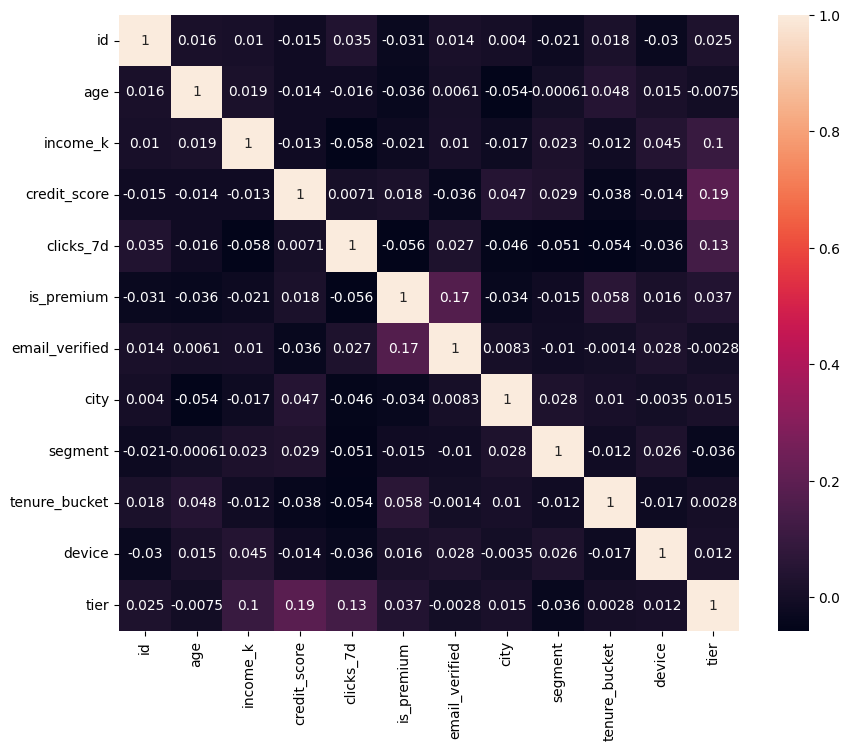

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [26]:
data.columns

Index(['id', 'age', 'income_k', 'credit_score', 'clicks_7d', 'is_premium',
       'email_verified', 'city', 'segment', 'tenure_bucket', 'device', 'tier'],
      dtype='object')

In [27]:
d1=pd.read_csv('customer_tier_classification.csv')
d1.head()

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze


In [28]:
d1['segment'].value_counts()

segment
A    325
C    260
D    258
B    252
E     48
b     18
c     14
a     11
d      6
e      1
Name: count, dtype: int64

In [29]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1218 non-null   int64  
 1   age             1218 non-null   int64  
 2   income_k        1128 non-null   float64
 3   credit_score    1144 non-null   float64
 4   clicks_7d       1218 non-null   int64  
 5   is_premium      1218 non-null   bool   
 6   email_verified  1211 non-null   object 
 7   city            1170 non-null   object 
 8   segment         1193 non-null   object 
 9   tenure_bucket   1187 non-null   object 
 10  device          1218 non-null   object 
 11  tier            1218 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 106.0+ KB


In [30]:
x=d1.drop(columns=['id','tier'])
y=d1['tier']

In [31]:
x

,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device
0,23,47.78,62.5,4,False,True,NaN,B,NaN,Android
1,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web
2,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android
3,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android
4,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS
...,...,...,...,...,...,...,...,...,...,...
1213,18,55.54,57.5,4,True,False,Kochi,C,5+y,Android
1214,20,123.79,71.8,4,False,True,Bhopal,D,New,Android
1215,26,39.25,80.4,0,False,True,Vizag,D,1-3y,Android
1216,42,32.72,58.1,3,False,True,Madurai,B,1-3y,iOS


In [32]:
numeric_col = ['age','income_k','credit_score','clicks_7d']
bool_col = [c for c in ['is_premium','email_verified'] if c in x.columns]
nominal_col = [c for c in ['city','segment','device'] if c in x.columns]
ordinal_col = [c for c in ['tenure_bucket'] if c in x.columns]


In [33]:
tenure_order = ['New','1-3y','3-5y','5+y']

In [34]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipe = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='median')),
    ("scalar" , StandardScaler(with_mean=True,with_std=True))
])

bool_pipe = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='most_frequent')),
])

nominal_pipe =Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(sparse_output=False))
])
ordinal_pipe =Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy='most_frequent')),
    ("onehot", OrdinalEncoder(categories= [tenure_order]))
])

preprocess = ColumnTransformer(transformers=[
    ("num", num_pipe , numeric_col),
    ("bool", bool_pipe,bool_col),
    ("nom", nominal_pipe,nominal_col),
    ("ord", ordinal_pipe ,ordinal_col)
], remainder = "drop")



In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [36]:
from sklearn.linear_model._logistic import LogisticRegression
log_reg_clf = Pipeline(
    steps=[
        ("preprocess" , preprocess),
        ("clf", LogisticRegression(max_iter=1000 , multi_class="multinomial"))
    ]
)

In [37]:
log_reg_clf.fit(x_train,y_train)

c:\Users\AKASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
y_pred = log_reg_clf.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print("Accuracy Score :",accuracy_score(y_test, y_pred))   

[[63  2 16]
 [ 1 60 14]
 [21 17 50]]
Accuracy Score : 0.7090163934426229


under fit -- high bias -- data splitting problem

over fit -- high variance -- more epochs

In [41]:
import tensorflow
from tensorflow.keras import Sequential

In [43]:
from tensorflow.keras import layers
model = Sequential([
    layers.Input(shape=(x_train.shape[1:])),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(y_train.unique()), activation='softmax')
])

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])